# Статистический анализ данных

**Описание проекта**

В рамках проекта проводится исследование сервиса аренды самокатов GoFast. Основа исследования - данные о пользователях сервиса из нескольких городов, а также об их поездках.

*Цель проекта*: провести анализ данных и проверить ряд гипотез, способствующих повышению конкурентосопособности компании на рынке кикшеринга.

*Особенности работы сервиса*: Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

- *без подписки:*

абонентская плата отсутствует;\
стоимость одной минуты поездки — 8 рублей;\
стоимость старта (начала поездки) — 50 рублей;

- *с подпиской Ultra:*

абонентская плата — 199 рублей в месяц;\
стоимость одной минуты поездки — 6 рублей;\
стоимость старта — бесплатно.

**Описание исходных данных**

В исходных данных есть информация о пользователях, их поездках и подписках, сгруппированных в файлы.

*Пользователи — ‘users_go.csv’:*

‘user_id’ — уникальный идентификатор пользователя;\
‘name’ — имя пользователя;\
‘age’ — возраст;\
‘city’ — город;\
‘subscription_type’ — тип подписки (free, ultra).

*Поездки — ‘rides_go.csv’:*

user_id’ — уникальный идентификатор пользователя;\
‘distance’ — расстояние, которое пользователь проехал в текущей сессии (в метрах);\
‘duration’ — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;\
‘date’ — дата совершения поездки.

*Подписки — ‘subscriptions_go.csv’:*

‘subscription_type’ — тип подписки;\
‘minute_price’ — стоимость одной минуты поездки по данной подписке;\
‘start_ride_price’ — стоимость начала поездки;\
‘subscription_fee’ — стоимость ежемесячного платежа.

**Цели исследования**
1. Изучить следующие параметры: 
* Пользователи: возраст, город, тип подписки пользователей;
* Поездки: расстояние, длительность, дата поездки;
* Подписки: стоимость одной минуты пооздки, стоимость начала поездки, стоимость ежемесячного платежа.
2. Произвести предобработку данных: корректировка типов данных, поиск пропусков, дубликатов, выбивающихся значений.
3. Добавить в датафрейм "Поездки" новый столбец, содержащий информацию о номере месяца, когда была совершена поездка.
4. Изучить, визуализировать и описать обнаруженные особенности для следующих параметров:
* частота встречаемости городов;
* соотношение пользователей с подпиской и без подписки;
* возраст пользователей;
* расстояние, которое пользователь преодолел за одну поездку;
* продолжительность поездок.
5. Сформировать объединенный датафрейм, содержащий в себе информацию из датафреймов "Пользователи", "Поездки", "Подписки" в разрезе каждого уникального пользователя о совершенных поездках.
6. Сруппировать данные о пользователях в 2 датафрейма в зависимости от типа подписки (с подпиской и без).
7. Визуализировать данные о расстоянии и времени поездок для пользователей с подпиской и без. Сделать выводы по выявленным закономерностям.
8. Произвести расчет суммарного расстояния, количества поездок и суммарного времени для каждого пользователя за каждый месяц.
9. Рассчитать помесячную выручку, которую принёс каждый пользователь.
10. Провести проверку следующих гипотез:
* Тратят ли пользователи с подпиской больше времени на поездки?
* Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
* Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
11. Подготовить итоговые выводы исследования.

## Загрузка данных

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#Cоздаем 3 датафрейма с данными о пользователях, поездках и подписках
#Присваиваем значения загруженных датасетов для переменных
df_users = pd.read_csv('/datasets/users_go.csv') #далее - датафрейм "Пользователи"
df_rides = pd.read_csv('/datasets/rides_go.csv') #далее - датафрейм "Поездки"
df_subs = pd.read_csv('/datasets/subscriptions_go.csv') #далее - датафрейм "Подписки"

In [3]:
#Получаем базовую информацию о датафреймах
display(df_users.head(10), df_users.tail(10))
df_users.info()

display(df_rides.head(10), df_rides.tail(10))
df_rides.info()

display(df_subs.head())
df_subs.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


,user_id,name,age,city,subscription_type
1555,72,Никита,25,Москва,ultra
1556,422,Кирилл,27,Сочи,ultra
1557,611,Владимир,28,Омск,ultra
1558,1237,Евгения,23,Тюмень,free
1559,209,Андрей,23,Омск,ultra
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra
1564,1045,Артемий,28,Ростов-на-Дону,free


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


,user_id,distance,duration,date
18058,1534,195.447469,6.469074,2021-06-11
18059,1534,3214.021065,18.343604,2021-06-18
18060,1534,3644.708038,20.289416,2021-08-08
18061,1534,3977.744996,26.916544,2021-08-20
18062,1534,4928.173852,22.560373,2021-09-13
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27
18067,1534,2371.711192,15.893917,2021-12-29


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [4]:
# Количество пропусков в df_users
display(df_users.isna().sum())

# Количество пропусков в df_rides
display(df_rides.isna().sum())

# Количество пропусков в df_subs
display(df_subs.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id     0
distance    0
duration    0
date        0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [5]:
# Количество явных дубликатов
print('Количество явных дубликатов в df_users:', df_users.duplicated().sum())
print('Количество явных дубликатов в df_rides:', df_rides.duplicated().sum())
print('Количество явных дубликатов в df_subs:', df_subs.duplicated().sum())

Количество явных дубликатов в df_users: 31
Количество явных дубликатов в df_rides: 0
Количество явных дубликатов в df_subs: 0


In [6]:
# Проверим столбец 'user_id' в df_users по структуре распределения явных дубликатов
print(df_users['user_id'].value_counts().head(31))

209     2
807     2
611     2
43      2
737     2
47      2
1198    2
829     2
924     2
153     2
635     2
72      2
909     2
908     2
136     2
1045    2
1237    2
127     2
659     2
307     2
1245    2
121     2
666     2
108     2
297     2
809     2
293     2
16      2
422     2
403     2
204     2
Name: user_id, dtype: int64


In [7]:
# Проверим уникальные типы подписок в датафрейме df_users
print(df_users['subscription_type'].unique())
print(df_users['subscription_type'].value_counts())

['ultra' 'free']
free     846
ultra    719
Name: subscription_type, dtype: int64


In [8]:
# Уникальные наименования населенных пунктов в датафрейме df_users
print('Список уникальных наименований населенных пунктов:', len(df_users['city'].unique()))
print(df_users['city'].value_counts())

Список уникальных наименований населенных пунктов: 8
Пятигорск         226
Екатеринбург      206
Ростов-на-Дону    202
Краснодар         196
Сочи              192
Омск              186
Тюмень            185
Москва            172
Name: city, dtype: int64


**Первичные итоги ознакомления с данными:**

1. Датафрейм "Пользователи" содержит информацию по 1565 пользователям сервиса, имеющих 5 характеристик (идентификатор пользователя, имя, город, возраст, а также тип подписки). Найден 31 дубликат среди идентификаторов пользователей.
2. Датафрейм "Поездки" содержит информацию по 18068 поездкам пользователей с учетом 4 характеристик (идентификатор пользователя, расстояние, продолжительность и дата поездки).
3. Датафрейм "Подписки" содержит информацию по 2 типам подписок, доступным пользователям в зависимости от выбранной стоимости минут, старта поездки и ежемесячного платежа.
4. Во всех датафреймах отсутствуют пропуски. Названия столбцов соответствуют стилю snake_case.
5. Определены рекомендации в целях корректировки типов данных по следующим датафреймам:
- **Поездки**: 'date' - тип данных можно преобразовать в тип даты и времени (datetime64).

## Предобработка данных

Начнем с обработки явных дубликатов и корректировки типов данных в соответствии с предложенными рекомендациями.

In [9]:
#Удаляем явные дубликаты в датафрейме 'df_users'
df_users = df_users.drop_duplicates()
print('Количество явных дубликатов в df_users:', df_users.duplicated().sum())
print('Количество уникальных идентификаторов пользователей:', df_users['user_id'].nunique())

Количество явных дубликатов в df_users: 0
Количество уникальных идентификаторов пользователей: 1534


In [10]:
# Корректировка столбца 'date' в датафейме 'df_rides'
df_rides['date'] = pd.to_datetime(df_rides['date'], format='%Y-%m-%d')

Добавляем новый столбец с номером месяца на основе столбца 'date' в датафрейме **"Поездки"**.

In [11]:
#Создаем новый столбец с номером месяца на основе столбца 'date' в датафрейме df_rides
df_rides['month'] = pd.DatetimeIndex(df_rides['date']).month

Проверим **результаты** предобработки данных.

In [12]:
# Датафрейм df_users
df_users.info()
df_users.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [13]:
# Датафрейм df_rides
df_rides.info()
df_rides.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [14]:
# Датафрейм df_subs
df_subs.info()
df_subs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Итоги предобработки данных:**
1. Скорректированы типы данных во всех столбцах, где это возможно технически и логически.
2. Обработаны явные дубликаты в датафрейме "Пользователи". Неявные дубликаты не выявлены.
3. В датафрейм "Поездки" добавлен новый столбец 'month', содержащий информацию о номере месяца, когда была совершена поездка (на основе столбца 'date').

## Исследовательский анализ данных

Теперь изучим и визуализируем следующую информацию о пользователях и поездках:
- частота встречаемости городов;
- соотношение пользователей с подпиской и без подписки;
- возраст пользователей;
- расстояние, которое пользователь преодолел за одну поездку;
- продолжительность поездок.

### Частота встречаемости городов

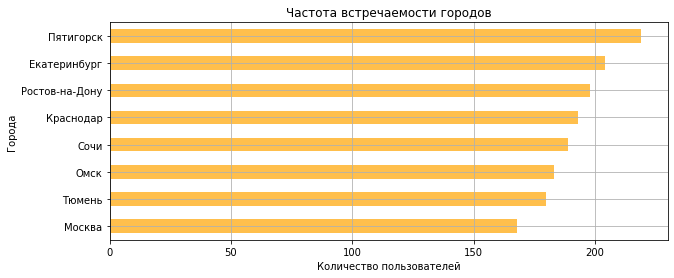

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


In [15]:
# Строим столбчатую диаграмму
df_users_city = df_users.pivot_table(index = 'city', values = 'user_id', aggfunc = 'count')
df_users_city = df_users_city.sort_values(by='user_id', ascending = True)
df_users_city.plot(kind='barh', figsize = (10,4), title = 'Частота встречаемости городов', color='orange', alpha = 0.7, legend = False, grid = True)
plt.xlabel('Количество пользователей')
plt.ylabel('Города')
plt.show()

display(df_users_city.sort_values(by='user_id', ascending = False))

**Выводы о частоте встречаемости городов:**

1. Всего в датафрейме "Пользователи" представлена статистика по **8 городам** России: Пятигорск, Екатеринбург, Ростов-на-Дону, Краснодар, Сочи, Омск, Тюмень, Москва.
2. Городом-лидером по использованию сервиса оказался **Пятигорск** (219 уникальных пользователей). Город с наименьшей популярностью сервиса - **Москва** (168 уникальных пользователей).

### Соотношение пользователей с подпиской и без подписки

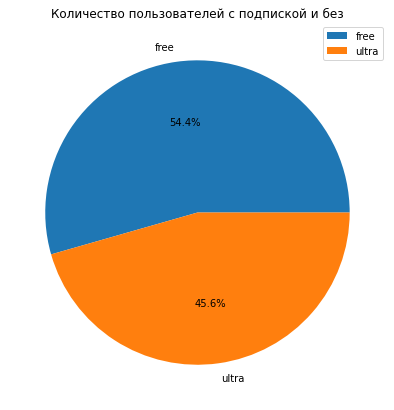

,subscription_type,user_id
0,free,835
1,ultra,699


In [16]:
# Построим круговую диаграмму для определения соотношения
df_users_subs = df_users.pivot_table(index = 'subscription_type', values = 'user_id', aggfunc = 'count').reset_index()
df_users_subs.plot(kind = 'pie', y='user_id', label = '', figsize=(10,7), labels = ['free', 'ultra'], title='Количество пользователей с подпиской и без', autopct='%1.1f%%')
plt.show()

display(df_users_subs)

**Выводы о соотношении пользователей с подпиской и без:**

1. Всего обладателей тарифа без подписки (тариф **'free') - 835 чел.**, с подпиской (тариф **'ultra') - 699 чел.**.
2. Из диаграммы видно, что доля пользователей на тарифе 'free' примерно на 10% превышает долю пользователей на тарифе 'ultra'. 
В целом доли обеих групп можно считать сопоставимыми в структуре использования сервиса.

### Возраст пользователей

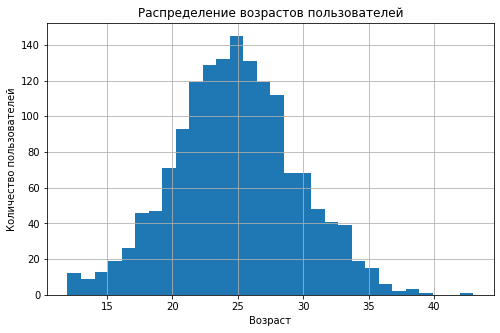

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [17]:
# Строим гистограмму распределения возрастов пользователей
df_users.plot(kind = 'hist', y = 'age', grid=True, figsize = (8,5), bins = 30, legend = False, title = 'Распределение возрастов пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

# Смотрим вспомогательные характеристики для описания возраста 
df_users['age'].describe()

**Выводы о распределении возрастов пользователей:**

1. Услугами сервиса аренды самокатов пользуются люди **от 12 до 43 лет**. 
2. Из гистограммы видим, что выборка возрастов имеет нормальное распределение. 
3. Наиболее популярный возраст пользователей - **25 лет**. При этом медиана и среднее значение по выборке фактически совпадают: 25 и 24.9 лет, соответственно.

### Расстояние, которое пользователь преодолел за одну поездку

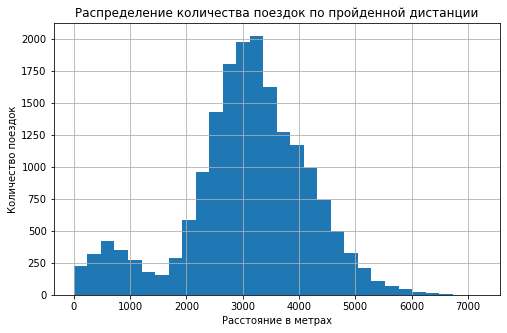

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [18]:
# Проанализируем параметр 'distance' в датафрейме 'df_rides'
# Строим гистограмму распределения пройденного расстояния
df_rides.plot(kind = 'hist', y = 'distance', grid=True, figsize = (8,5), bins = 30, legend = False, title = 'Распределение количества поездок по пройденной дистанции')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

# Смотрим вспомогательные характеристики для описания расстояния 
df_rides['distance'].describe()

**Выводы о распределении количества поездок по пройденной дистанции:**

1. Диапазон пройденного расстояния за одну поездку варьируется от 1 до 7211 метров.
2. Среднее расстояние за одну поездку составляет около 3 км, медианное значение равно 3134 метров.
3. На гистограмме виден небольшой колокол вокруг значения 600 метров. Данную закономерность можно объяснить инфраструктурными реалиями небольших городов России: желание быстро добраться из точки А в точку Б там, где не ходит общественный транспорт и/или нет личного траспортного средства.

### Продолжительность поездок

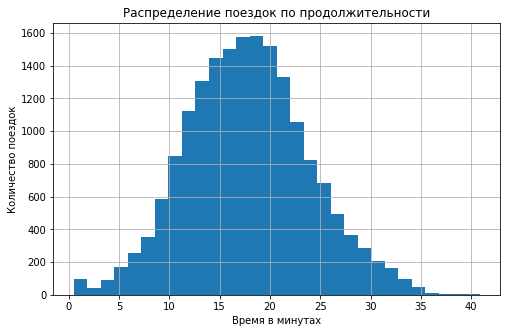

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [19]:
# Проанализируем параметр 'duration' в датафрейме 'df_rides'
# Строим гистограмму распределения времени на одну поездку
df_rides.plot(kind = 'hist', y = 'duration', grid=True, figsize = (8,5), bins = 30, legend = False, title = 'Распределение поездок по продолжительности')
plt.xlabel('Время в минутах')
plt.ylabel('Количество поездок')
plt.show()

# Смотрим вспомогательные характеристики для описания продолжительности поездки 
df_rides['duration'].describe()

In [20]:
# Внимательнее рассмотрим краткосрочные поездки (до 1 минуты) с точки зрения пройденной дистанции

df_rides.query('duration < 1')['distance'].describe()

count      95.000000
mean     5113.176549
std       658.254104
min      4030.308008
25%      4611.510820
50%      5052.769411
75%      5488.459099
max      7211.007745
Name: distance, dtype: float64

Среднее и медианное значения расстояния для 95 поездок продолжительностью до 1 минуты выглядят подозрительно большими. Исключим выявленную аномалию из датафрейма "Поездки".

In [21]:
# Удаляем строки с продолжительностью поездки до 1 минуты

df_rides = df_rides[df_rides['duration'] > 1]

# Смотрим обновленные характеристики по продолжительности поездки
df_rides['duration'].describe()

count    17973.000000
mean        17.896480
std          5.975424
min          2.035632
25%         13.670439
50%         17.714122
75%         21.747016
max         40.823963
Name: duration, dtype: float64

**Выводы о распределении количества поездок по пройденной дистанции:**

1. Продолжительность одной поездки варьируется в диапазоне от 2 до 41 минут.
2. Из гистограммы видим, что выборка продолжительности поездок имеет нормальное распределение. 
2. Наиболее встречаемая продолжительность одной поездки (как среднее, так и медианное значение) составляет **18 минут**.

## Объединение данных

### Объединение данных о пользователях, поездках и подписках

In [22]:
# Строим общую таблицу с данными из датафреймов 'df_users', 'df_rides', 'df_subs'
total_df = df_users.merge(df_rides, on='user_id').merge(df_subs, on='subscription_type')

# Проверим базовую информацию о новом датафрейме
display(total_df.head(10), total_df.tail(10))
print()
total_df.info()
print()
total_df['user_id'].value_counts()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
17963,1534,Альберт,25,Краснодар,free,195.447469,6.469074,2021-06-11,6,8,50,0
17964,1534,Альберт,25,Краснодар,free,3214.021065,18.343604,2021-06-18,6,8,50,0
17965,1534,Альберт,25,Краснодар,free,3644.708038,20.289416,2021-08-08,8,8,50,0
17966,1534,Альберт,25,Краснодар,free,3977.744996,26.916544,2021-08-20,8,8,50,0
17967,1534,Альберт,25,Краснодар,free,4928.173852,22.560373,2021-09-13,9,8,50,0
17968,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0
17972,1534,Альберт,25,Краснодар,free,2371.711192,15.893917,2021-12-29,12,8,50,0



<class 'pandas.core.frame.DataFrame'>
Int64Index: 17973 entries, 0 to 17972
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   name               17973 non-null  object        
 2   age                17973 non-null  int64         
 3   city               17973 non-null  object        
 4   subscription_type  17973 non-null  object        
 5   distance           17973 non-null  float64       
 6   duration           17973 non-null  float64       
 7   date               17973 non-null  datetime64[ns]
 8   month              17973 non-null  int64         
 9   minute_price       17973 non-null  int64         
 10  start_ride_price   17973 non-null  int64         
 11  subscription_fee   17973 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB



1236    27
1063    26
783     26
1204    24
1531    23
        ..
644      3
104      3
412      3
342      2
366      2
Name: user_id, Length: 1534, dtype: int64

В объединенном датафрейме 'total_df' содержится информация в разрезе каждого уникального пользователя о совершенных поездках в 2021 году. Всего собрано записей - 17973. Максимальное число поездок на одного человека - 27, минимальное - 2.

### Группировка данных о пользователях с подпиской и без

In [23]:
# Создаем таблицу с пользователями с подпиской (тариф 'ultra')
ultra_subs = total_df.loc[total_df['subscription_type'] == 'ultra']
display(ultra_subs.head())
print('Количество поездок пользователей с подпиской (тариф \'ultra\'):', ultra_subs.shape[0])

# Создаем таблицу с пользователями без подписки (тариф 'free')
free_subs = total_df.loc[total_df['subscription_type'] == 'free']
display(free_subs.head())
print('Количество поездок пользователей без подписки (тариф \'free\'):', free_subs.shape[0])
print()
print('Количество поездок пользователей без подписки (тариф \'free\') в', round(free_subs.shape[0] / ultra_subs.shape[0]), 'раза больше доли поездок пользователей с подпиской (тариф \'ultra\')')

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Количество поездок пользователей с подпиской (тариф 'ultra'): 6500


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


Количество поездок пользователей без подписки (тариф 'free'): 11473

Количество поездок пользователей без подписки (тариф 'free') в 2 раза больше доли поездок пользователей с подпиской (тариф 'ultra')


### Визуализация данных о расстоянии и времени поездок для пользователей с подпиской и без

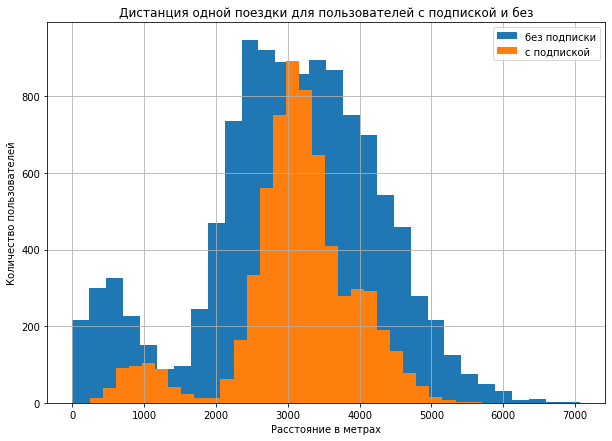

In [24]:
# Построим совмещенный график с гистограммами по расстоянию поездки
free_subs['distance'].plot(kind = 'hist', grid=True, figsize = (10,7), bins = 30, label='без подписки')
ultra_subs['distance'].plot(kind = 'hist', grid=True, figsize = (10,7), bins = 30, label='с подпиской')
plt.title('Дистанция одной поездки для пользователей с подпиской и без')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество пользователей')
plt.legend(loc='best')
plt.show()

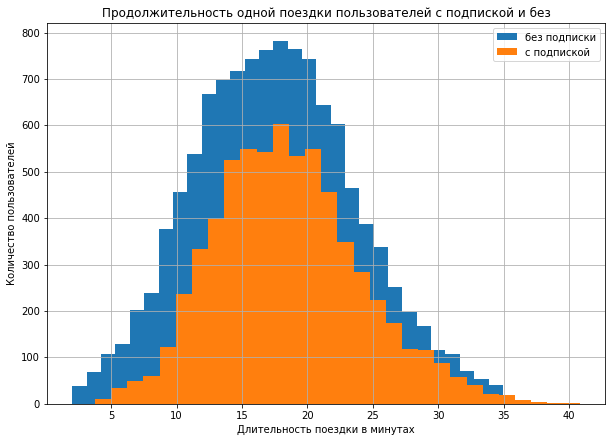

In [25]:
# Построим совмещенный график с гистограммами по продолжительности поездки
free_subs['duration'].plot(kind = 'hist', grid=True, figsize = (10,7), bins = 30, label='без подписки')
ultra_subs['duration'].plot(kind = 'hist', grid=True, figsize = (10,7), bins = 30, label='с подпиской')
plt.title('Продолжительность одной поездки пользователей с подпиской и без')
plt.xlabel('Длительность поездки в минутах')
plt.ylabel('Количество пользователей')
plt.legend(loc='best')
plt.show()

In [26]:
# Посмотрим на разницу в описательных характеристиках датафреймов с подпиской и без
display(round(ultra_subs.describe() - free_subs.describe()))

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,-4973.0,-4973.0,-4973.0,-4973.0,-4973.0,-4973.0,-4973.0,-4973.0
mean,-772.0,0.0,87.0,1.0,-0.0,-2.0,-50.0,199.0
std,-40.0,0.0,-399.0,-1.0,-0.0,0.0,0.0,0.0
min,-699.0,0.0,243.0,2.0,0.0,-2.0,-50.0,199.0
25%,-740.0,0.0,425.0,1.0,0.0,-2.0,-50.0,199.0
50%,-772.0,0.0,47.0,1.0,-1.0,-2.0,-50.0,199.0
75%,-804.0,0.0,-323.0,0.0,0.0,-2.0,-50.0,199.0
max,-835.0,-5.0,-1366.0,6.0,0.0,-2.0,-50.0,199.0


**Выводы по зависимости расстояния и продолжительности поездки от типа подписки:**
1. **Расстояние**: дистанция поездки оказалась сильно зависима от фактора наличия подписки. В среднем пользователи с тарифом "Ultra" проезжают за одну поездку на 87 метров больше, чем обладатели тарифа "Free". Разрыв между минимальными значениями по подписке и без составляет 399 метров, а между максимальными - 1.4 км. По гистограммам можно выделить два пика распределения частоты поездок. Первый небольшой пик на меньших дистанциях и второй основной пик на больших дистанциях. Так, меньший пик тарифа "Ultra" находится в районе 1000 метров, а основной в районе 3100 метров. Меньший пик тарифа "Free" расположен в районе 600 метров, а основной - 2500 метров. В целом пики тарифа "Ultra" более выражены и имеют меньший разброс, чем на тарифе "Free".
2. **Продолжительность**: пользователи с тарифом "Ultra" катаются дольше обладателей тарифа "Free": минимальное время поездки по подписке больше на 2 минуты, а максимальное - больше на 6 минут. Пик распределения частоты поездок по обоим тарифам приходится на 18 минут.

## Подсчёт выручки

5.1 Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц на основе данных из объединенного датафрейма 'total_df'.

In [27]:
# Округлим время поездки до следующего целого числа в столбце 'duration', изменим тип данных на целочисленный
total_df['duration'] = np.ceil(total_df['duration'])
total_df['duration'] = total_df['duration'].astype('int')
total_df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,8,6,0,199


In [28]:
# Создаем сводную таблицу с агрегированными данными по пользователям, месяцам, дистанции и продолжительности поездки

users_months_duration = total_df.pivot_table(index=('user_id', 'month'), values=('distance','duration'), aggfunc=('count', 'sum')).reset_index()

# Убираем двухэтажные наименования столбцов
users_months_duration.columns = ['user_id', 'month', 'distance_count', 'distance_sum', 'duration_count', 'duration_sum']
# Удалим из таблицы дубль столбца 'count' (количество поездок)
users_months_duration = users_months_duration.drop(columns=['duration_count'])
users_months_duration

,user_id,month,distance_count,distance_sum,duration_sum
0,1,1,2,7027.511294,42
1,1,4,1,754.159807,7
2,1,8,2,6723.470560,46
3,1,10,2,5809.911100,32
4,1,11,3,7003.499363,56
...,...,...,...,...,...
11295,1534,6,2,3409.468534,26
11296,1534,8,2,7622.453034,48
11297,1534,9,1,4928.173852,23
11298,1534,11,4,13350.015305,78


5.2. Добавим в 'users_months_duration' столбец с помесячной выручкой, которую принёс каждый пользователь.\
Помесячная выручка будет рассчитана по формуле: *стоимость старта поездки * количество поездок + стоимость одной минуты поездки * общая продолжительность всех поездок в минутах + стоимость подписки.*

In [29]:
# Добавим новые данные из датафреймов df_users, df_subs для расчета выручки
users_months_duration = users_months_duration.merge(df_users, how='left', on='user_id')
users_months_duration = users_months_duration.merge(df_subs, how = 'left', on='subscription_type')

# Добавляем столбец с выручкой и считаем выручку для каждого пользователя за каждый месяц
users_months_duration['revenue'] = (
    (total_df['start_ride_price'] * users_months_duration['distance_count']) 
    + (total_df['minute_price'] * users_months_duration['duration_sum']) 
    + total_df['subscription_fee']
)

#Изменим тип данных по столбцу 'revenue' на целочисленный
users_months_duration['revenue'] = users_months_duration['revenue'].astype('int')
users_months_duration

,user_id,month,distance_count,distance_sum,duration_sum,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,2,7027.511294,42,Кира,22,Тюмень,ultra,6,0,199,451
1,1,4,1,754.159807,7,Кира,22,Тюмень,ultra,6,0,199,241
2,1,8,2,6723.470560,46,Кира,22,Тюмень,ultra,6,0,199,475
3,1,10,2,5809.911100,32,Кира,22,Тюмень,ultra,6,0,199,391
4,1,11,3,7003.499363,56,Кира,22,Тюмень,ultra,6,0,199,535
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11295,1534,6,2,3409.468534,26,Альберт,25,Краснодар,free,8,50,0,308
11296,1534,8,2,7622.453034,48,Альберт,25,Краснодар,free,8,50,0,484
11297,1534,9,1,4928.173852,23,Альберт,25,Краснодар,free,8,50,0,234
11298,1534,11,4,13350.015305,78,Альберт,25,Краснодар,free,8,50,0,824


В результате проделанной работы создана агрегированная таблица, содержащая следующие сведения о пользователях сервиса:
- distance_count - количество поездок пользователя за месяц;
- distance_count - общая дистанция пользователя за месяц;
- duration_sum - общая продолжительность поездок пользователя за месяц;
- revenue - сумма выручки, которую принёс пользователь за месяц.

## Проверка гипотез

В данном блоке исследуем ряд гипотез, поставленных перед командой аналитики GoFast.

**6.1 Тратят ли пользователи с подпиской больше времени на поездки?**

*Нулевая гипотеза (H0):* Средняя продолжительность поездок с подпиской 'ultra' и 'free' равна.\
*Альтернативная гипотеза (Н1):* Средняя продолжительность поездок с подпиской 'ultra' больше, чем с подпиской 'free'.

In [30]:
# Проверим равенство средних 2-х генеральных совокупностей

alpha = 0.05 # уровень статистической значимости

# Альтенативная гипотеза является правосторонней, используем параметр 'greater'
results_6_1 = st.ttest_ind(ultra_subs['duration'], free_subs['duration'], alternative='greater')

print('p-значение:', results_6_1.pvalue) # расчет p-value

if results_6_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 4.704468074453899e-28
Отвергаем нулевую гипотезу


In [31]:
# Контрольная проверка средней продолжительности поездки
print('Средняя продолжительность поездок c подпиской (в минутах):', round(ultra_subs['duration'].mean(),2))
print('Средняя продолжительность поездок без подписки (в минутах):', round(free_subs['duration'].mean(),2))

Средняя продолжительность поездок c подпиской (в минутах): 18.54
Средняя продолжительность поездок без подписки (в минутах): 17.53


**Вывод**: Нулевая гипотеза отвергнута в пользу альтернативной. Таким образом можно утверждать, что *средняя продолжительность поездок с подпиской 'ultra' больше, чем с подпиской 'free'.*

**6.2 Расстояние одной поездки в 3130 метров - оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?**

*Нулевая гипотеза (H0):* Среднее расстояние поездки пользователи с подпиской 'ultra' равна 3130 метрам.\
*Альтернативная гипотеза (Н1):*  Среднее расстояние поездки пользователи с подпиской 'ultra' больше 3130 метров.

In [32]:
interested_value = 3130 # значение для сравнения

alpha = 0.05 # уровень статистической значимости

# Альтенативная гипотеза является правосторонней, используем параметр 'greater'
results_6_2 = st.ttest_1samp(ultra_subs['distance'], interested_value, alternative='greater')

print('p-значение:', results_6_2.pvalue)

if results_6_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


In [33]:
# Контрольная проверка среднего расстояния поездки
print('Средняя дистанция поездки по подписке \'ultra\' (в метрах):', round(ultra_subs['distance'].mean(),0))

Средняя дистанция поездки по подписке 'ultra' (в метрах): 3115.0


**Вывод**: Не получилось отвергнуть нулевую гипотезу. Таким образом *средняя дистанция поездки по подписке 'ultra' действительно меньше или равна 3130 метров.*

**6.3 Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?**

*Нулевая гипотеза (H0):* Средняя помесячная выручка от поездок с использованием подписки 'ultra' и подписки 'free' равны.\
*Альтернативная гипотеза (Н1):*  Средняя помесячная выручка от поездок с использованием подписки 'ultra' выше, чем выручка от подписки 'free'.

In [34]:
# Создаем две выборки по типам подписки, где будет рассчитана месячная выручка в разрезе каждого пользователя
users_months_duration_ultra = users_months_duration[users_months_duration['subscription_type'] == 'ultra']
users_months_duration_free = users_months_duration[users_months_duration['subscription_type'] == 'free']

alpha = 0.05 # уровень статистической значимости

# Альтенативная гипотеза является правосторонней, используем параметр 'greater'
results = st.ttest_ind(users_months_duration_ultra['revenue'], users_months_duration_free['revenue'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.057362827743691e-11
Отвергаем нулевую гипотезу


In [35]:
# Контрольная проверка выручки по подписке и без
print('Средняя помесячная выручка от пользователей с подпиской \'ultra\' (в рублях):', round(users_months_duration_ultra['revenue'].mean(),2))
print('Средняя помесячная выручка от пользователи без подписки (в рублях):', round(users_months_duration_free['revenue'].mean(),2))

Средняя помесячная выручка от пользователей с подпиской 'ultra' (в рублях): 362.79
Средняя помесячная выручка от пользователи без подписки (в рублях): 344.68


**Вывод**: Нулевая гипотеза отвергнута в пользу альтернативной. Таким образом *средняя помесячная выручка от поездок с использованием подписки 'ultra' действительно выше, чем выручка от пользователей с подпиской 'free'.*

**6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

Поскольку данные содержат статистику обращений по одним и тем же уникальным пользователям, можно сделать вывод о зависимости двух выборок - до и после обновления серверов - между собой. Из этого следует необходимость **проверки гипотез о равенстве средних для зависимых(парных) выборок**. Для этого используем *метод scipy.stats.ttest_rel()* с передачей в него двух параметров: набор данных до обновления серверов и тот же набор после примененных изменений.

# Общий вывод исследования

В ходе исследования был проведен анализ данных о пользователях сервиса аренды самокатов GoFast, собранных из 8 городов России по итогам 2021 года.
По результатам необходимо отметить, что ключевым фактором, принципиально влияющим на выручку компании, оказался **тип подписки**, который выбирают пользователи на основании своих потребностей. Так, обладатели расширенной подписки "Ultra" демонстрируют наиболее углубленную статистику взаимодействия с сервисом, чем пользователи с упрощенным типом подписки "Free". Об этом свидетельствуют данные по следующим параметрам использования сервиса:
1. *Дистанция поездки* - в среднем пользователи с тарифом "Ultra" проезжают за одну поездку на 87 метров больше, чем обладатели тарифа "Free". Разрыв между минимальными значениями между "Ultra" и "Free" составляет 399 метров, а между максимальными - 1.4 км. 
3. *Продолжительность поездки* - в среднем пользователи с тарифом "Ultra" проезжают за одну поездку на 1 минуту дольше обладателей тарифа "Free". Минимальное время поездки по подписке "Ultra" больше на 2 минуты, а максимальное - больше на 6 минут.

В то же время именно обладатели подписки "Free" имеют преобладающее значение в структуре использования сервиса (54.4% на тарифе "Free" против 45.6% на тарифе "Ultra"). Количество поездок пользователей на тарифе "Free" в 2 раза превышает долю поездок среди обладателей подписки "Ultra" (11.6 тысяч поездок на тарифе "Free" против 6.5 тысяч поездок на тарифе "Ultra").

В целом можно говорить о следующих описательных характеристиках типичного пользователя сервиса:
* город пребывания - Пятигорск;
* средний возраст пользователя - 25 лет;
* средняя продолжительность поездки - 18 минут;
* средняя дистанция поездки - 3 км.

По завершении аналитической работы были проверены и подтверждены следующие гипотезы:
- Средняя продолжительность поездок с подпиской "Ultra" больше, чем с подпиской "Free".
- Средняя дистанция поездки по подписке "Ultra" меньше или равна 3130 метров (оптимальное расстояние с точки зрения износа самоката);
- Средняя помесячная выручка от поездок с использованием подписки "Ultra" выше, чем выручка от подписки "Free".